# <font color='blue'>Analise de Dados de Recursos Humanos (RH)</font>

### Definição do Problema de Negocio


**Contexto e Conteúdo**


Uma empresa que atua em Big Data e Data Science deseja contratar cientistas de dados entre as pessoas que passam com sucesso em alguns cursos ministrados pela empresa. Muitas pessoas se inscrevem para o seu treinamento. Empresa quer saber quais desses candidatos são realmente quer trabalhar na empresa após o treinamento ou a procura de um novo emprego, pois isso ajuda a reduzir o custo e tempo, bem como a qualidade da formação ou planejamento dos cursos e categorização dos candidatos . Informações relacionadas a demografia, educação, experiência estão em mãos desde a inscrição e inscrição dos candidatos.

Esse conjunto de dados foi desenvolvido para entender os fatores que levam uma pessoa a deixar o emprego atual também para pesquisas de RH. Pelo(s) modelo(s) que usa(m) as credenciais atuais, dados demográficos e dados de experiência, você prevê a probabilidade de um candidato procurar um novo emprego ou trabalhar para a empresa, além de interpretar os fatores afetados na decisão do funcionário.


**Observação:**


     O conjunto de dados está desequilibrado.
     A maioria dos recursos são categóricos (nominal, ordinal, binário), alguns com alta cardinalidade.
     A imputação ausente também pode fazer parte do seu pipeline.
     
**Características**

- enrollee_id : ID exclusivo para candidato
- city: código da cidade
- city_ development _index : Índice de desenvolvimento da cidade (escala)
- gender: Sexo do candidato
- relevent_experience: Experiência relevante do candidato
- enrolled_university: Tipo de curso universitário matriculado, se houver
- education_level: Nível de escolaridade do candidato
- major_discipline : Educação disciplina principal do candidato
- experience: Experiência total do candidato em anos
- company_size: Nº de funcionários na empresa do empregador atual 
- company_type : Tipo de empregador atual
- lastnewjob: Diferença em anos entre o emprego anterior e o emprego atual
- training_hours: horas de treinamento concluídas
- target: 0 – Não procura mudança de emprego, 1 – Procura mudança de emprego


**Inspiração**

Prever a probabilidade de um candidato trabalhar para a empresa
Interpretar o(s) modelo(s) de forma a ilustrar quais características afetam a decisão do candidato


https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

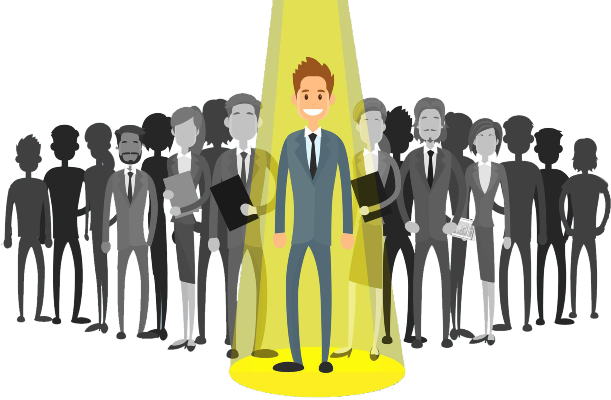

In [1]:
from IPython.display import Image
Image('pngwing.com.png')

## Instalando e Carregando os Pacotes

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versao do Python', python_version())

Versao do Python 3.10.4


## Importação das Bibliotecas

In [3]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno
sns.set()
%matplotlib inline

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning


In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science" --iversions

Author: Data Science

scipy            : 1.9.1
matplotlib       : 3.5.3
seaborn          : 0.11.2
pandas           : 1.4.4
plotly           : 5.10.0
category_encoders: 2.5.0
missingno        : 0.5.1
numpy            : 1.22.4



In [5]:
#!pip install -q watermark

## Carregando os Dados

In [6]:
# Carrega o dataset
df = pd.read_csv('dataset/aug_train.csv')

In [7]:
# Shape
df.shape

(19158, 14)

In [8]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [9]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [10]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados

In [11]:
# Descrevendo os dados não numéricos, apenas as variaveis do tipo (strings)
df.describe(include='O')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [12]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [13]:
# Criando uma Lista das Colunas Categoricas
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

**Função Para Plota anotações no graficos**

### Plot Grafico

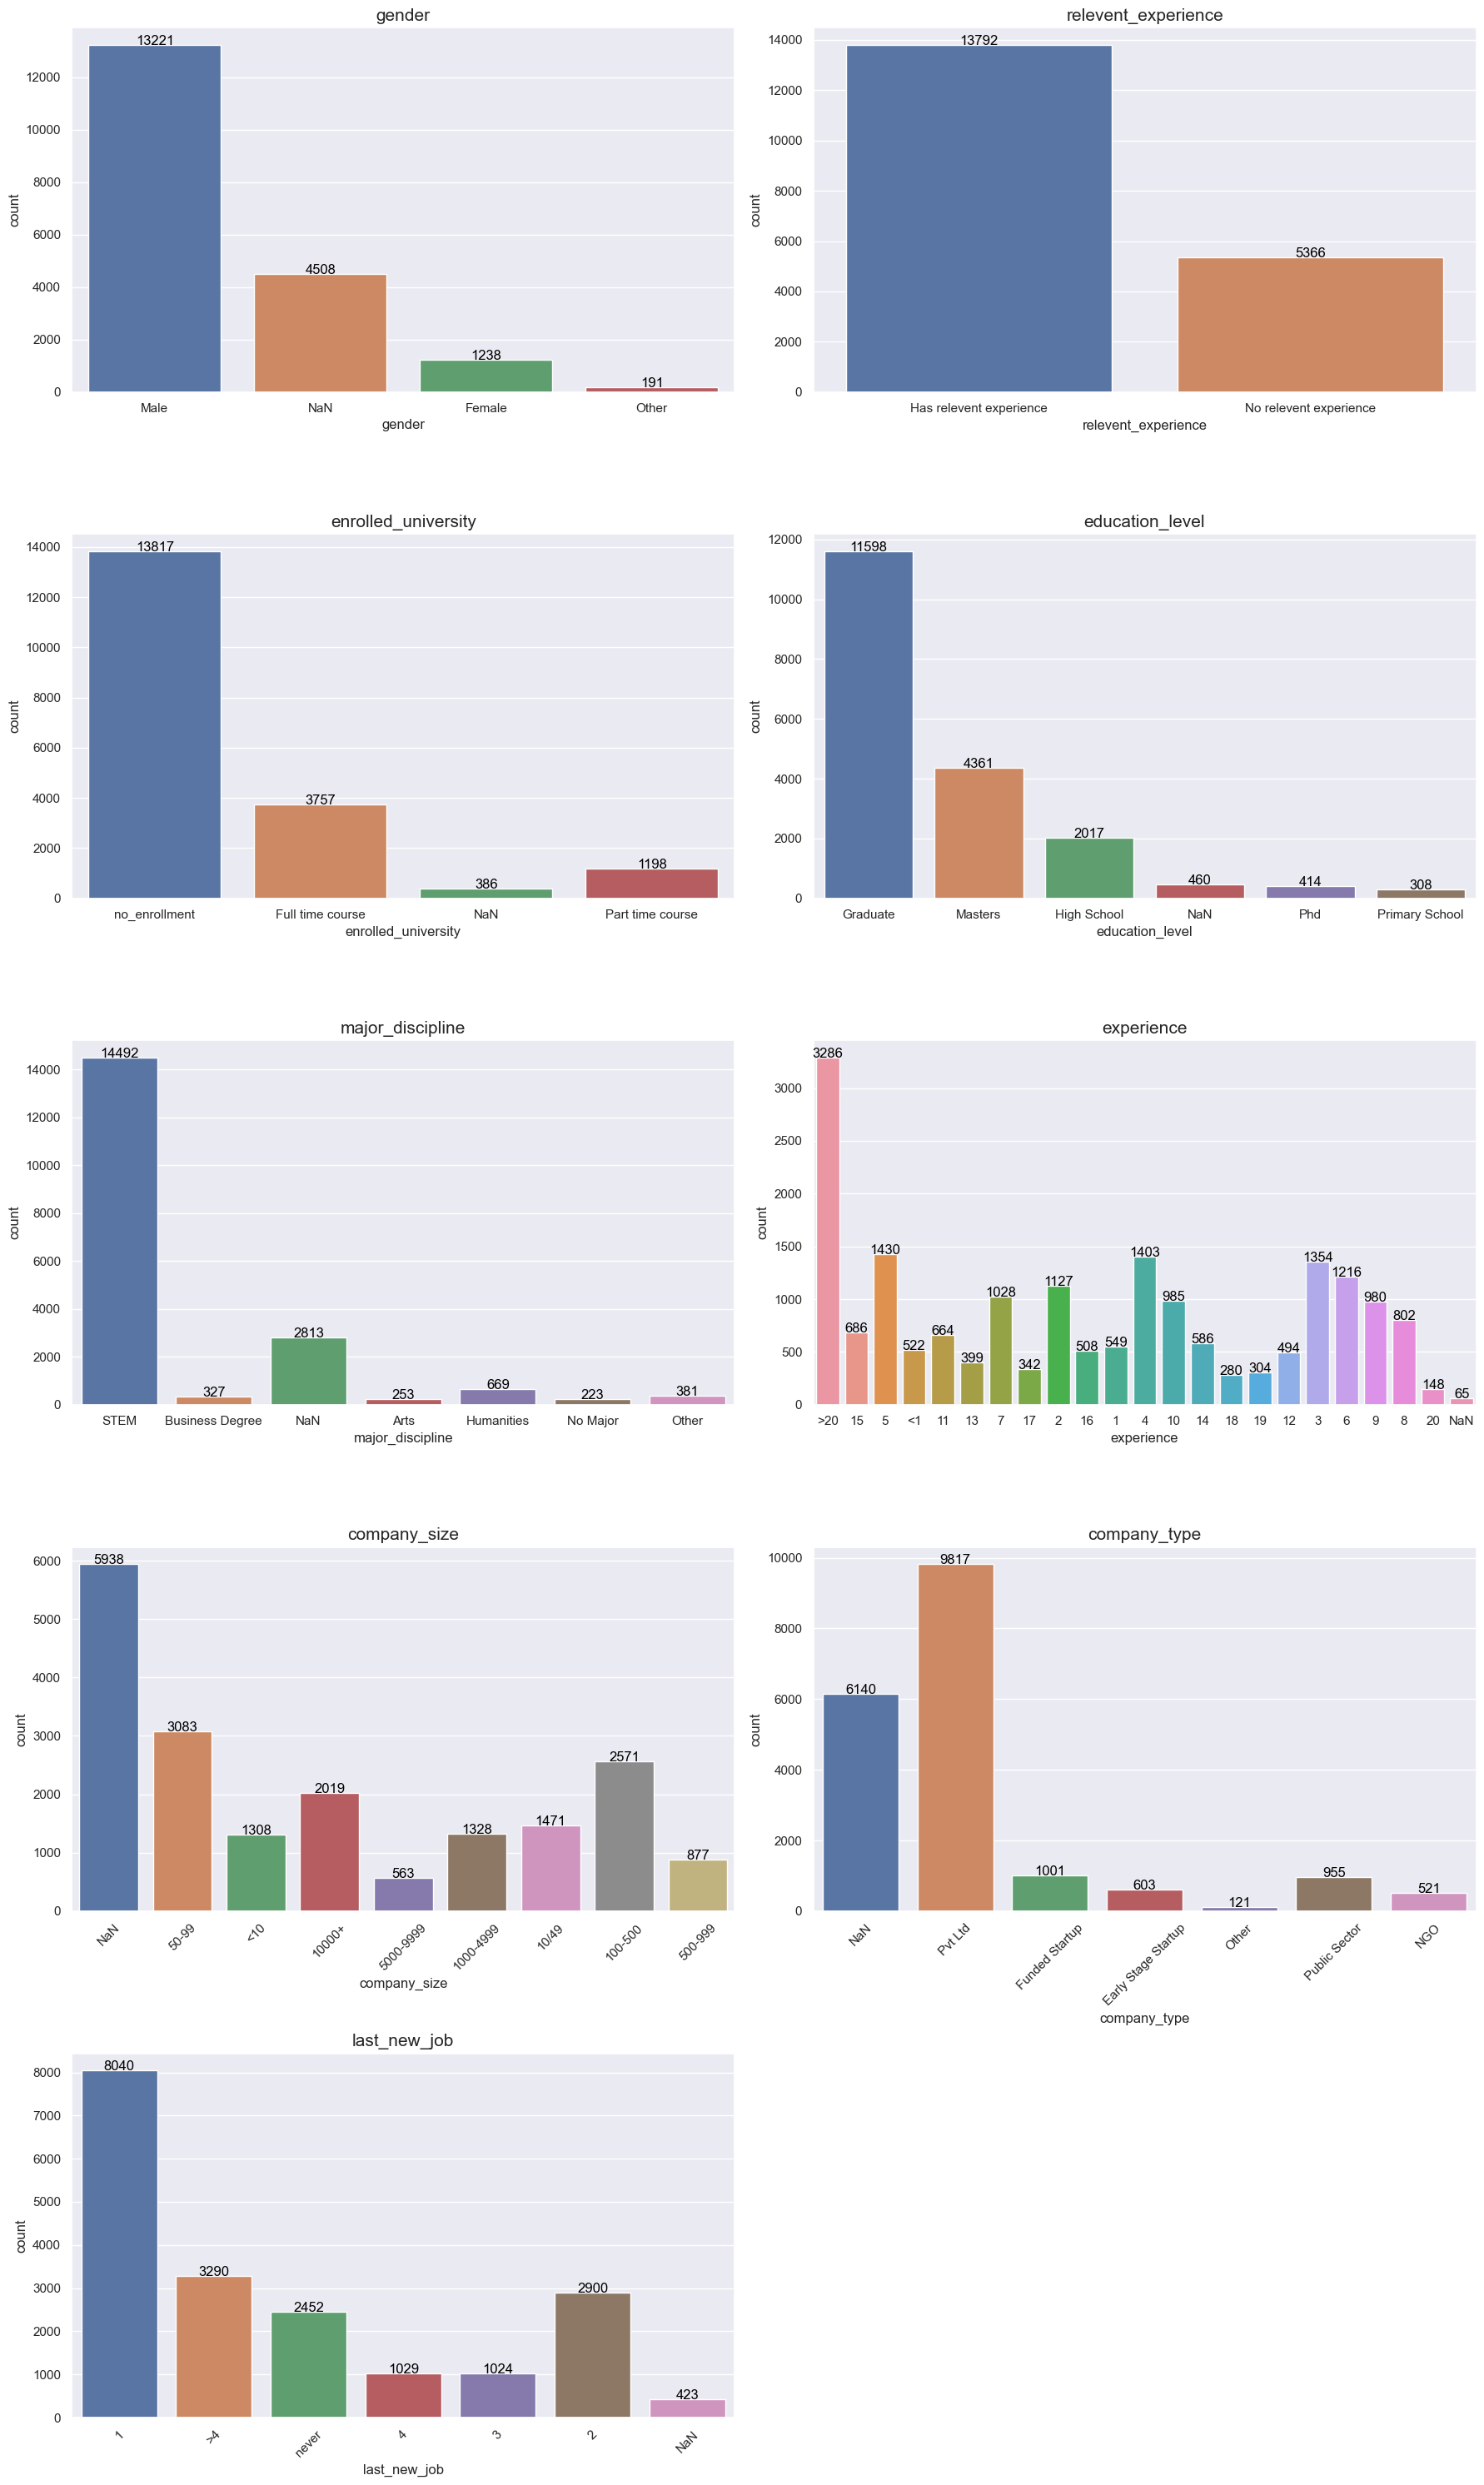

In [14]:
# Definindo o Tamanho da figura
plt.figure(figsize = (18, 30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Criando um Contador para o Loop FOR
contador = 0

# Loop FOR
for dados in column_list:
    contador += 1
    plt.subplot(5, 2, contador)
    ax = sns.countplot(data = df.fillna('NaN'), x = dados)
    plt.title(dados, fontsize =15)
    
    for k in ax.patches: # patches: são as anotacoes no grafico
            ax.annotate(f'{k.get_height()}', (k.get_x() + 0.4, k.get_height()),
                       ha ='center', color='black', size=12)
      
    if contador >= 7:
     plt.xticks(rotation = 45)
    
# Layout
plt.tight_layout(h_pad = 2)

### Verificando a Distribuição das Variáveis Numéricas

In [15]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


C:\Users\franc\anaconda3\envs\Python10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\franc\anaconda3\envs\Python10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


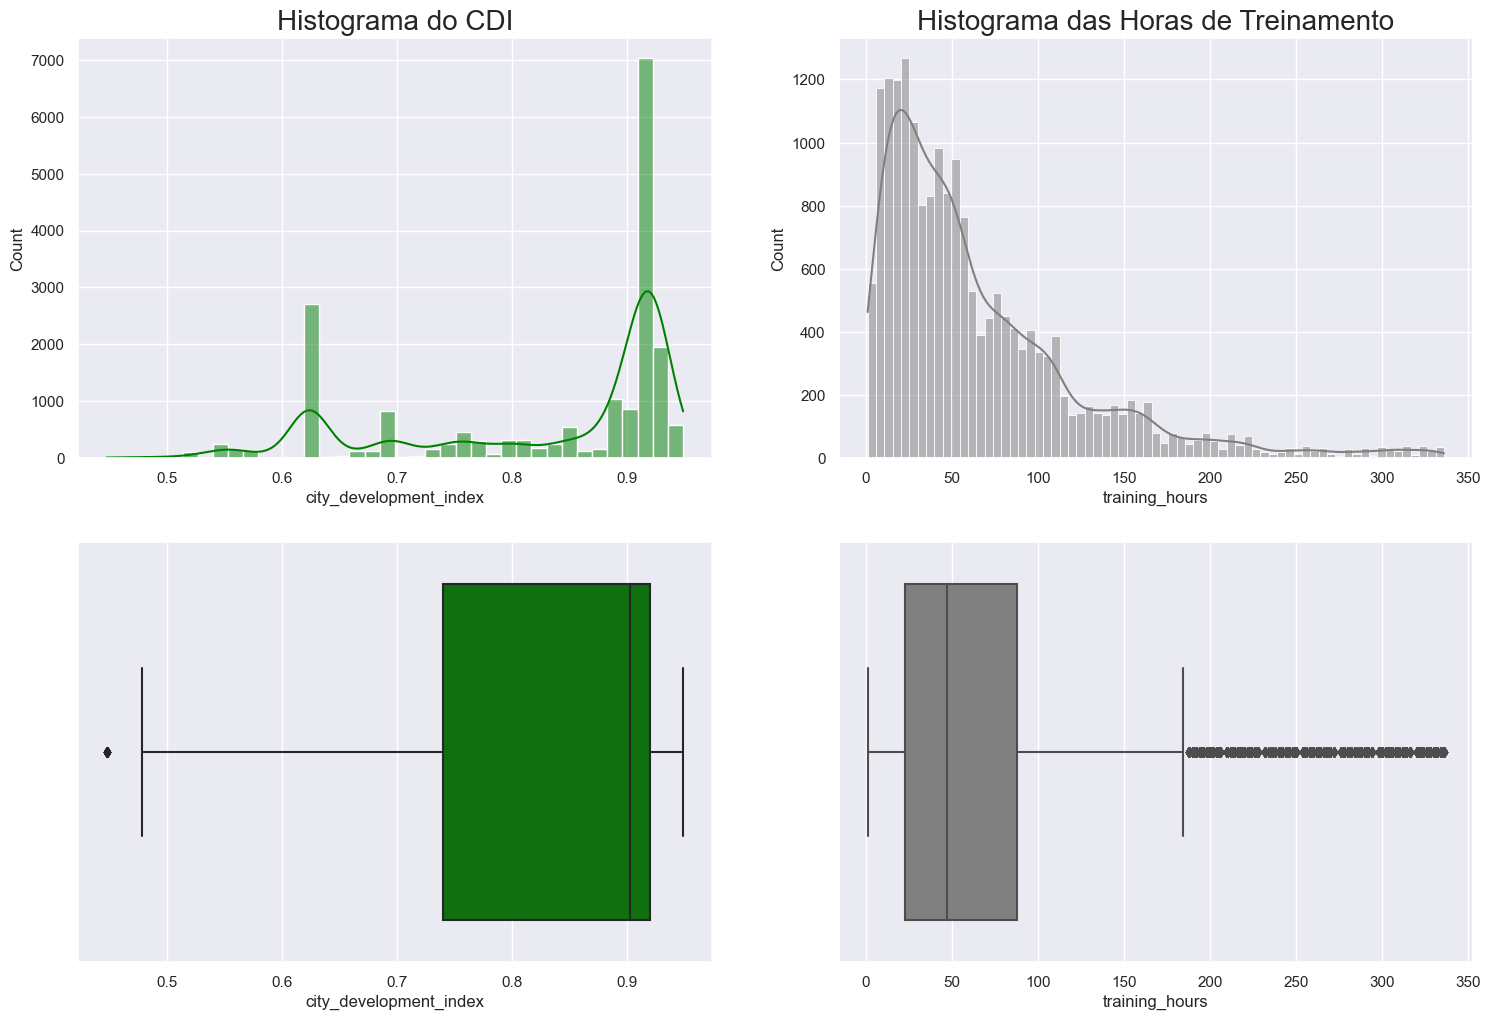

In [16]:
# Figura
plt.figure(figsize = (18, 12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(df['city_development_index'], kde=True, color='green')
plt.title('Histograma do CDI', fontsize=20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde=True, color='gray')
plt.title('Histograma das Horas de Treinamento', fontsize=20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color='green')

plt.subplot(224)
sns.boxplot(df['training_hours'], color='gray');

Em Estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse.

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

E o que é distribuição normal? É a mais importante dentre as distribuições estatísticas.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

![title](imagens/normal.png)

![title](imagens/boxplot.png)

**Teste de Normalidade da Distribuição**

In [17]:
# Lista com as variaveis numericas
numeric = ['city_development_index', 'training_hours']

# Loop For
for num in numeric:
    # Checa a normalidade
    stats, pval = normaltest(df[num])
    
    # Checa o valor-p
    if pval > 0.05:
        print(num, ': Distribuição Normal')
    else:
        print(num, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.


* Dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona. ;-)

### Correlação dos Dados

#### Correlação de Spearman Entre Variáveis Numéricas

Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [18]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [19]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [20]:
# Criamos uma cópia do dataframe original
df_numeric = df.copy()

In [21]:
df_numeric['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [22]:
# Convertemos a variável experience para numérica
df_numeric['experience'] = np.where(df_numeric['experience'] == '<1', 1, df_numeric['experience'])
df_numeric['experience'] = np.where(df_numeric['experience'] == '>20', 21, df_numeric['experience'])
df_numeric['experience'] = df_numeric['experience'].astype(float)

In [23]:
df_numeric['experience'].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [24]:
df_numeric['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [25]:
# Convertemos a variável last_new_job para numérica
df_numeric['last_new_job'] = np.where(df_numeric['last_new_job'] == 'never', 0, df_numeric['last_new_job'])
df_numeric['last_new_job'] = np.where(df_numeric['last_new_job'] == '>4', 5, df_numeric['last_new_job'])
df_numeric['last_new_job'] = df_numeric['last_new_job'].astype(float)

In [26]:
df_numeric['last_new_job'].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [27]:
df_numeric.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [28]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [29]:
df_numeric.drop('enrollee_id', axis=1).corr('spearman')

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


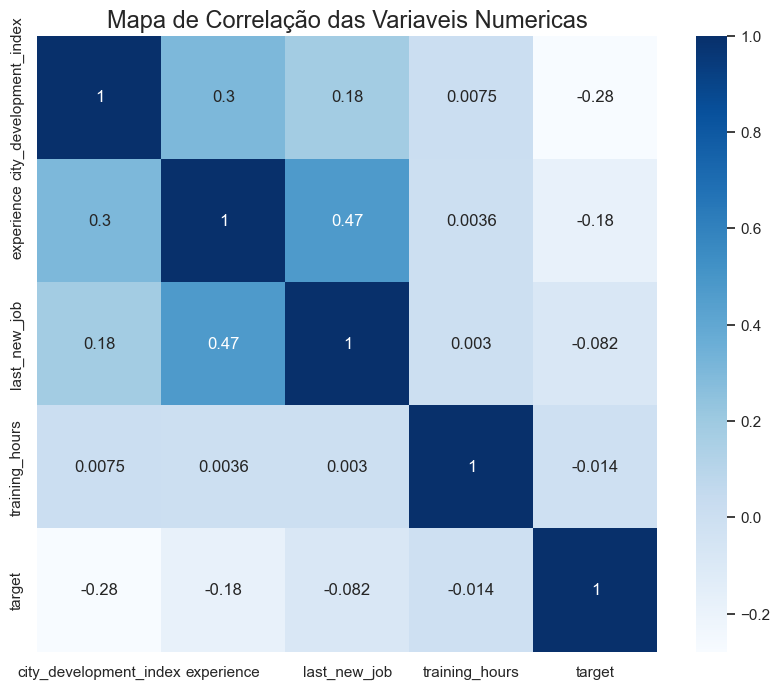

In [30]:
# Heatmap mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.drop('enrollee_id', axis=1).corr('spearman'), annot=True, cmap='Blues')
plt.title('Mapa de Correlação das Variaveis Numericas', fontsize=17);

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.

Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [31]:
# Criando uma Função de Printe Bonita
def pr(*sms):
    print('=-'*32)
    print(sms)
    print('-='*32)

# Criando um Loop For 
for i in df.drop(columns = ['target', 'enrollee_id', 'city',
                            'city_development_index',
                            'training_hours', 'experience',
                            'last_new_job','company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv  = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    pr(df_woe_iv)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
(target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337,)
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
(target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523,)
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
(target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Pa

**Plot do Information Value**

<Figure size 1500x1500 with 0 Axes>

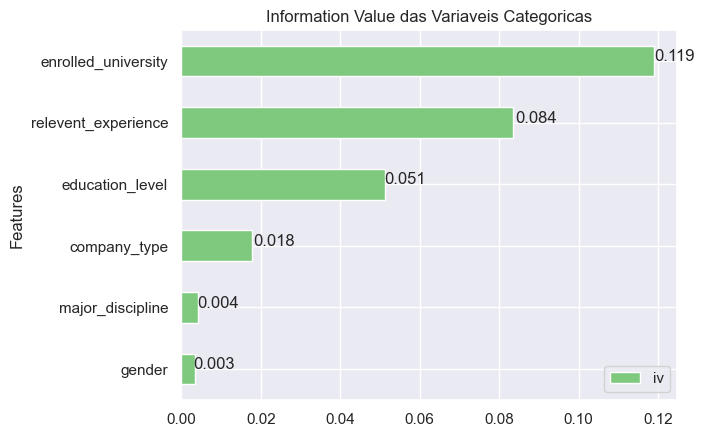

In [32]:
# Variaveis categoricas
columns_cat = df.drop(columns = ['target', 'enrollee_id', 'city',
                                 'city_development_index',
                                 'training_hours', 'experience',
                                 'last_new_job', 'company_size']).columns

# Lista para o IV
iv = []

# Loop For
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv  = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
# DataFrame
df_iv = pd.DataFrame({'Features':columns_cat, 'iv':iv}).set_index('Features').sort_values(by='iv')

# Figura
plt.figure(figsize = (15, 15))
df_iv.plot(kind = 'barh', title='Information Value das Variaveis Categoricas', colormap='Accent')

for index, value in enumerate(list(round(df_iv['iv'], 3))):
    plt.text((value), index, str(value))
plt.legend(loc = 'lower right');

* No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

### Identificando Valores Ausentes

C:\Users\franc\anaconda3\envs\Python10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


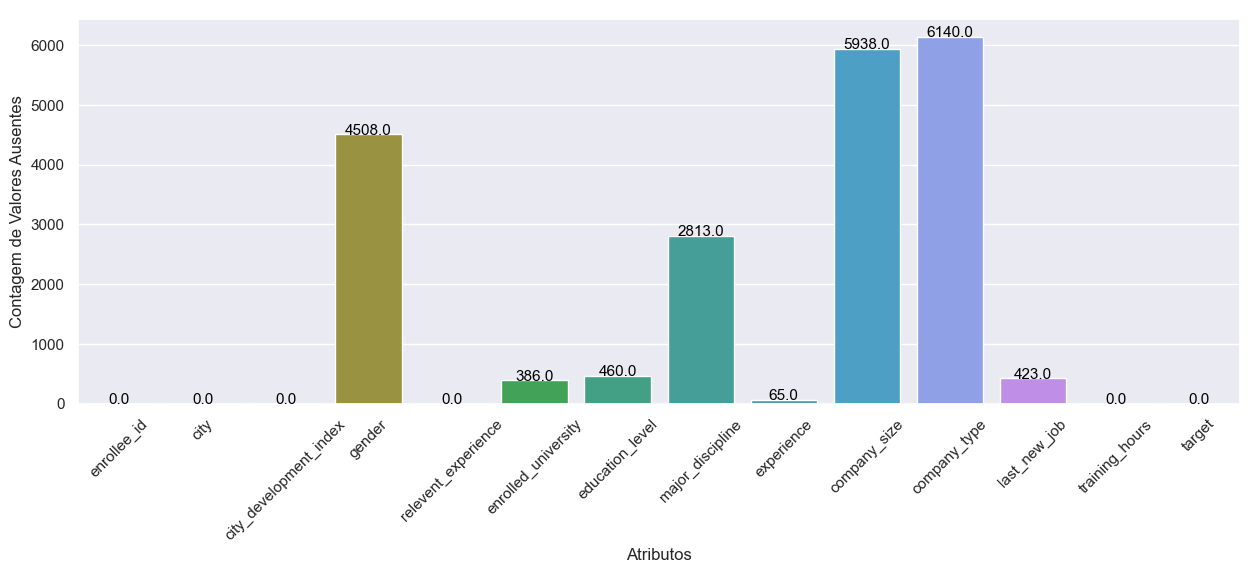

In [33]:
# Valores Ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15, 5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11);

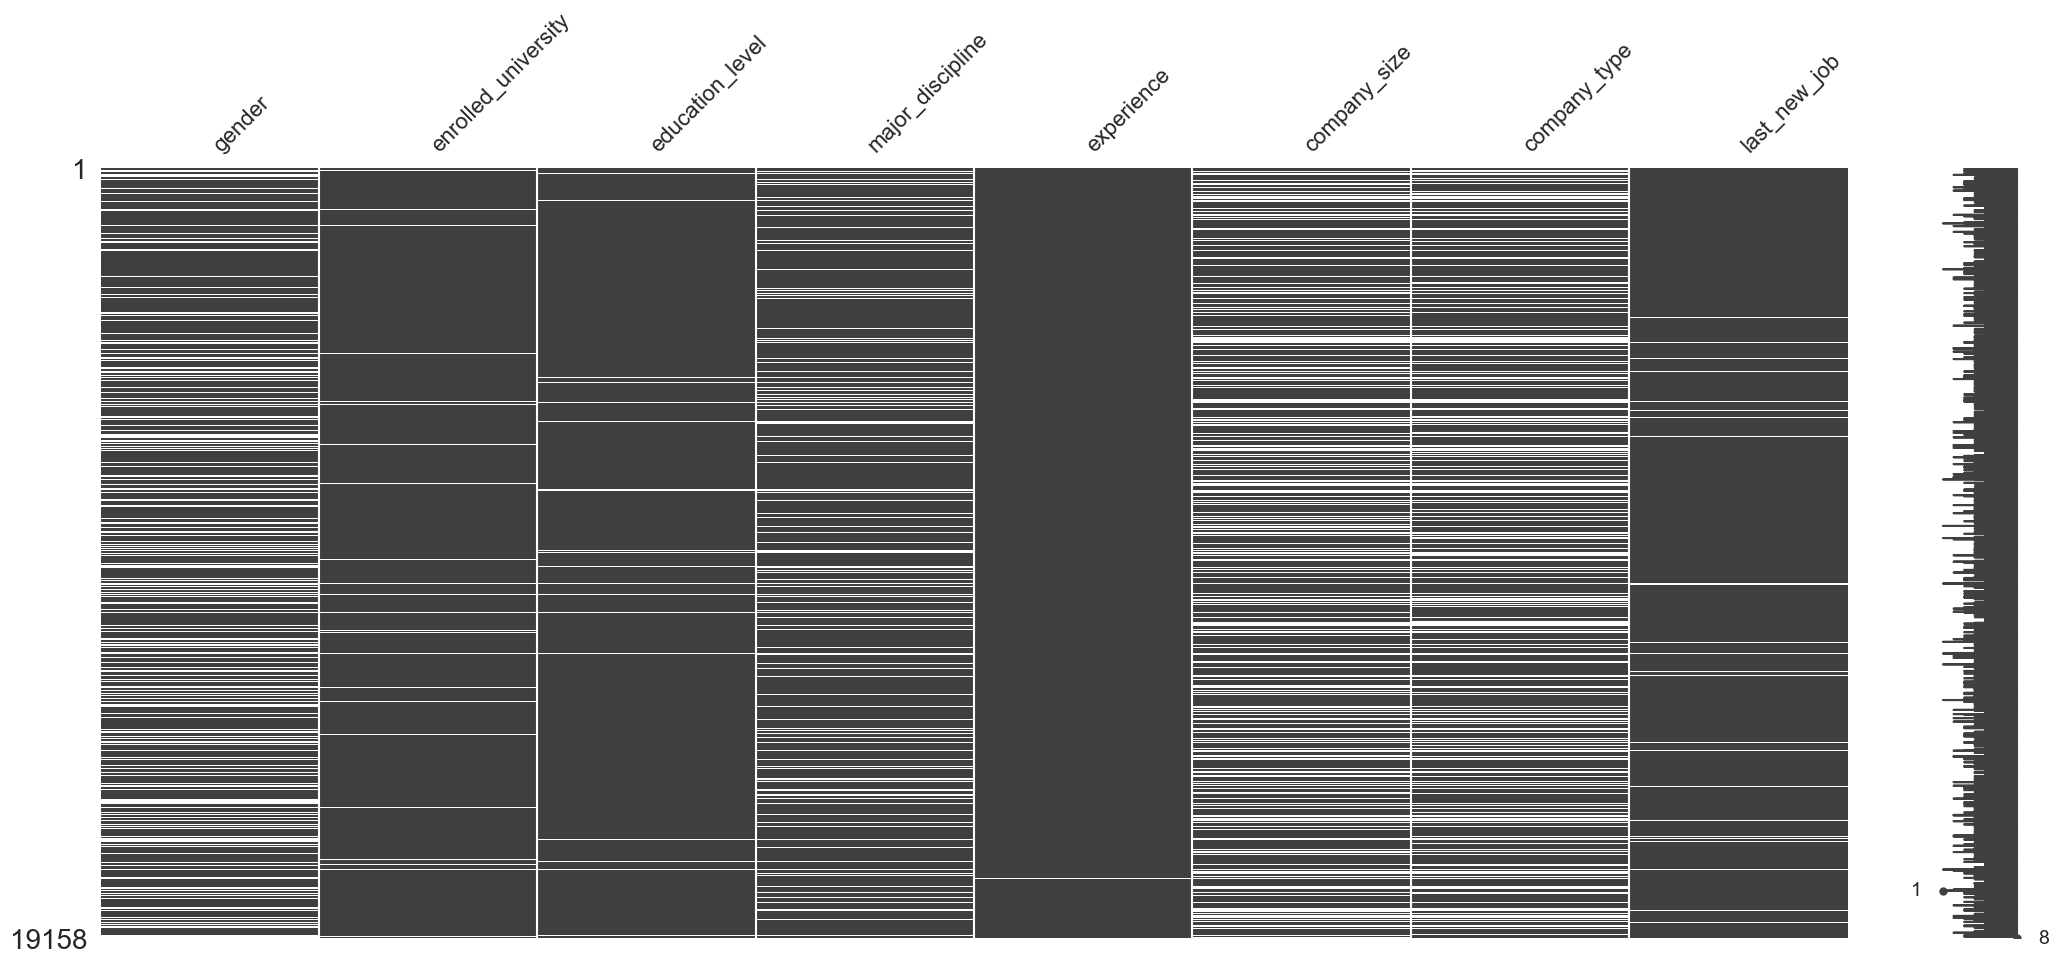

In [34]:
# Gera a Visualizaçao de Valores Ausentes
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]> 0].index]);

Valores ausentes em cada coluna têm um padrão aleatório.

### Identificando Valores Duplicados

In [35]:
# Checando valores duplicados (não há)
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

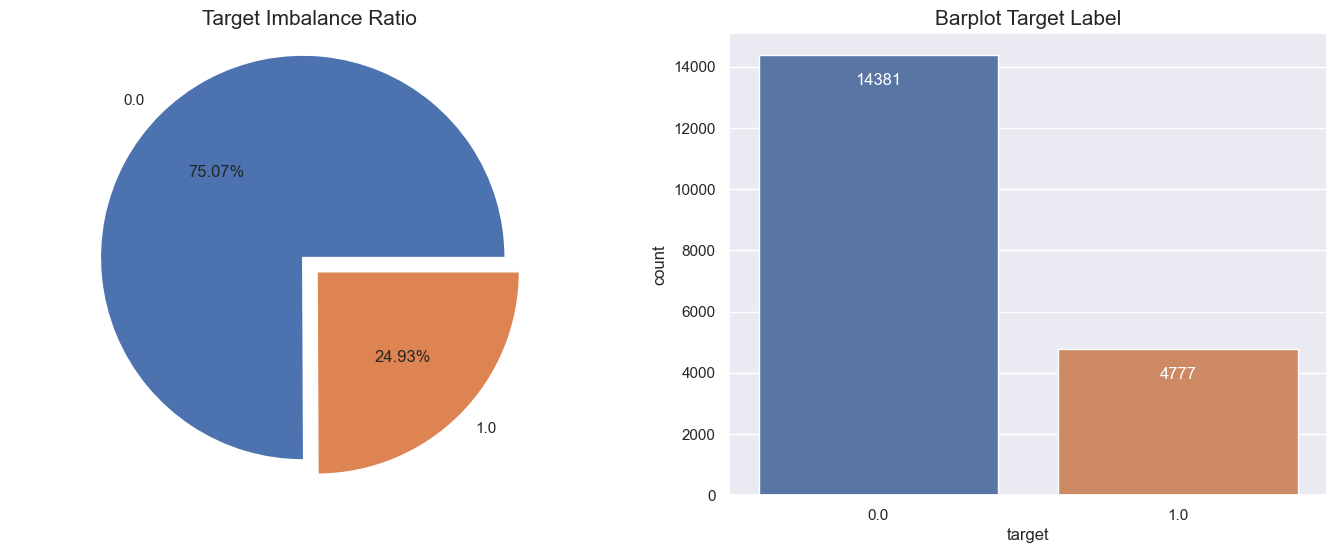

In [36]:
# Figura
plt.figure(figsize = (17,6))
plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df)*100, 2),
       labels = list(df['target'].value_counts().index),
       autopct = '%.2f%%', explode = (0, 0.1))

plt.axis('equal')
plt.title('Target Imbalance Ratio', size=15)

plt.subplot(122)
ax = sns.countplot(data = df, x ='target')
plt.title('Barplot Target Label', fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,  p.get_height()), 
                ha = 'center',  va = 'top', color = 'white',  size = 12);

Os dados estão desbalanceados em relação à variável target.

## Limpeza e Processamento dos Dados

Em que momento fazemos a limpeza dos dados?

### Tratando os Valores Ausentes

In [37]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [38]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [39]:
# Novo Dataframe
new_df = df[colunas_manter]
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


C:\Users\franc\anaconda3\envs\Python10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


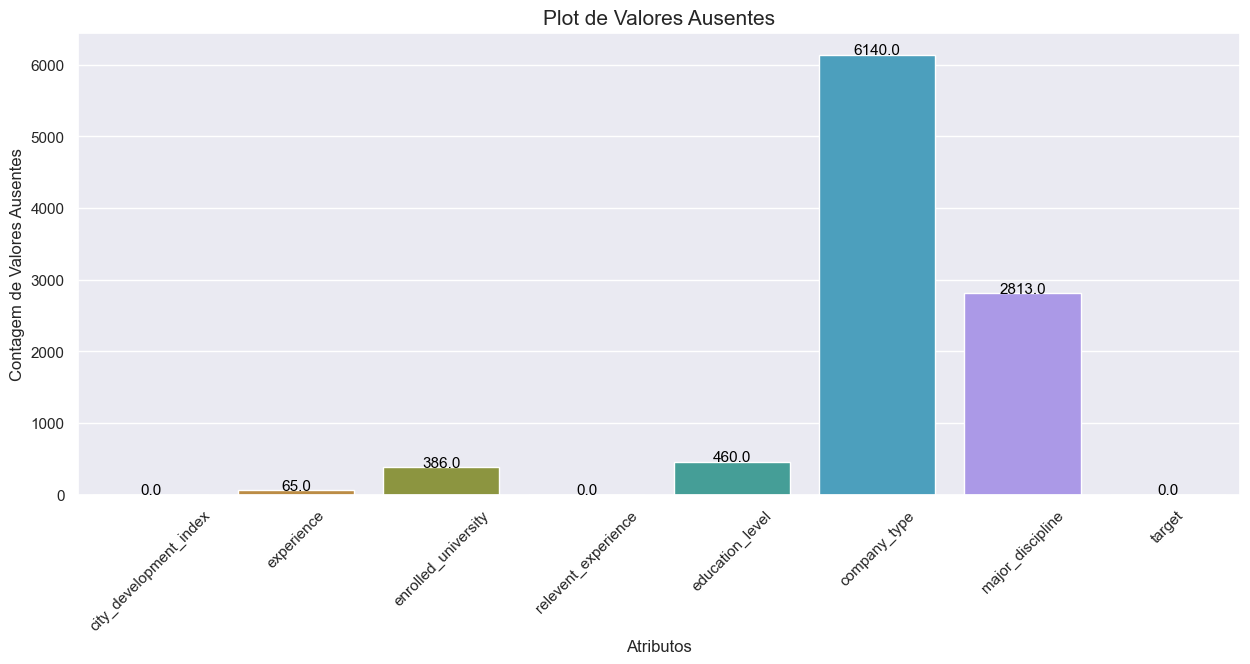

In [40]:
# Valores Ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura grafica
ax = plt.figure(figsize = (15, 6))

#Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title('Plot de Valores Ausentes', fontsize=15)

# São apenas as anotações nos graficos
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11);

#### Variável major_discipline

In [41]:
def anotacoes():
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', 
                    (p.get_x()+0.4, p.get_height()),
                    ha = 'center', color = 'black', size = 10)

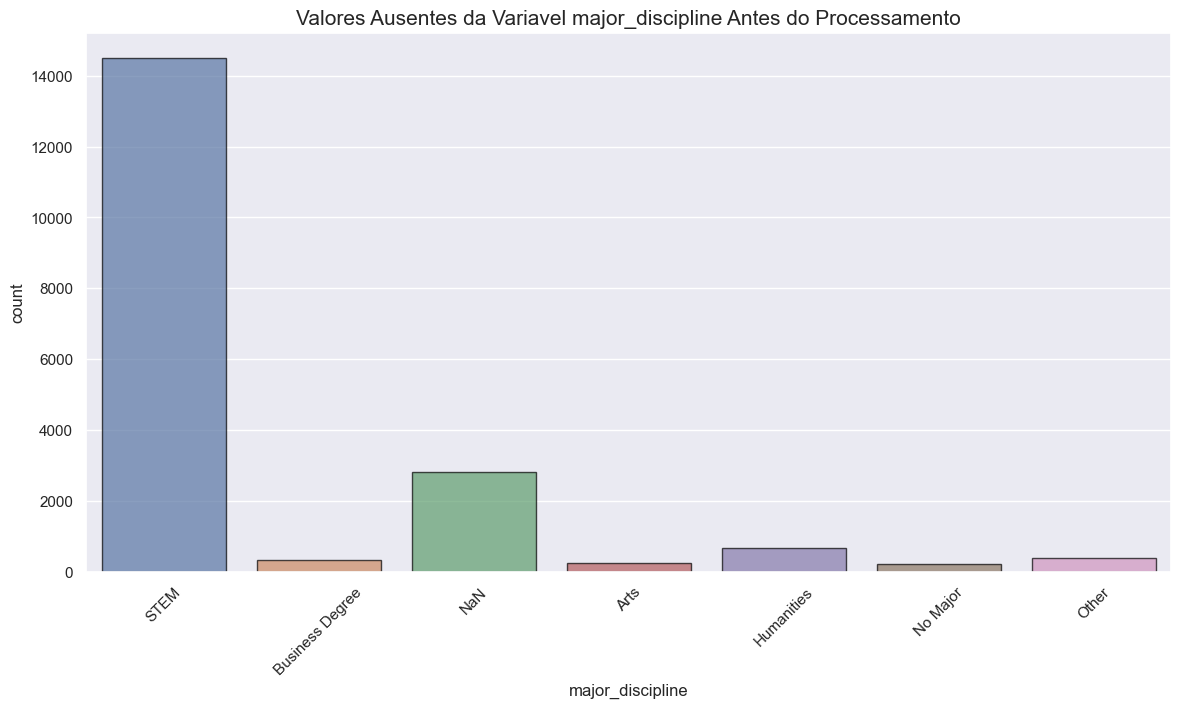

In [42]:
# Valores Ausentes da variavel major_discipline Antes do Processamento
plt.figure(figsize=(14, 7))
sns.countplot(data=new_df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
plt.xticks(rotation=45)
bound = ax.get_xbound()
plt.title('Valores Ausentes da Variavel major_discipline Antes do Processamento', fontsize=15);

In [43]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variavel major_discipline: ', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variavel education_level: ')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)


Total de Valores Ausentes na Variavel major_discipline:  2813

Proporção de Valores Ausentes na Variavel education_level: 


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Dentre os registros com valores ausentes, vemos a proporção na variável education_level.

Preencheremos os valores NA da variável `major_discipline` com `Non Degree`.

In [44]:
# Cria o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) &
                  ((new_df['education_level'] == 'High School') | 
                   (new_df['education_level'].isna())| 
                   (new_df['education_level'] == 'Primary School'))]).index

In [45]:
len(nan_index)

2785

In [46]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

C:\Users\franc\AppData\Local\Temp\ipykernel_15048\1007621839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['major_discipline'][nan_index] = 'Non Degree'
C:\Users\franc\AppData\Local\Temp\ipykernel_15048\1007621839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['major_discipline'][nan_index] = 'Non Degree'


In [47]:
print('Total de Valores Ausentes major_discipline: ', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna=False)

Total de Valores Ausentes major_discipline:  28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

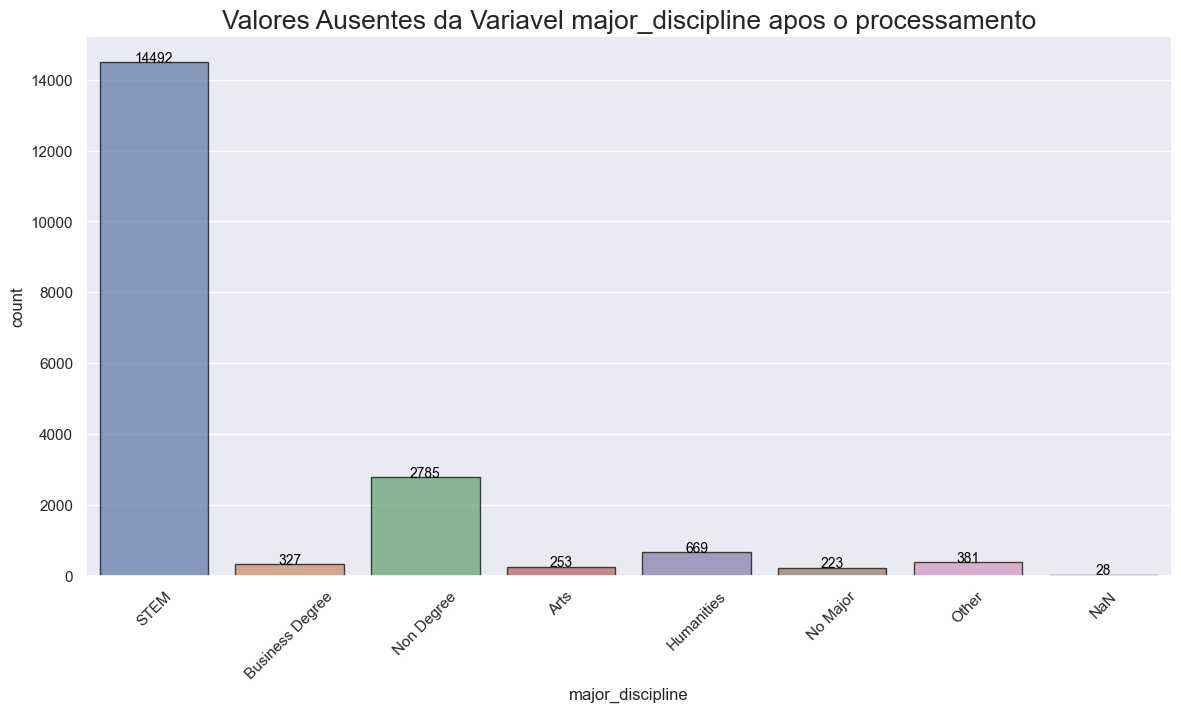

In [48]:
# Valores Ausentes da Variável major_discipline Após o Processamento
plt.figure(figsize = (14, 7))
sns.countplot(data = new_df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound = ax.get_xbound()
ax = plt.gca()
plt.title('Valores Ausentes da Variavel major_discipline apos o processamento', fontsize=19)
anotacoes()

In [49]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()] = 'Other'

C:\Users\franc\AppData\Local\Temp\ipykernel_15048\1615278103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_df['major_discipline'].isna()] = 'Other'


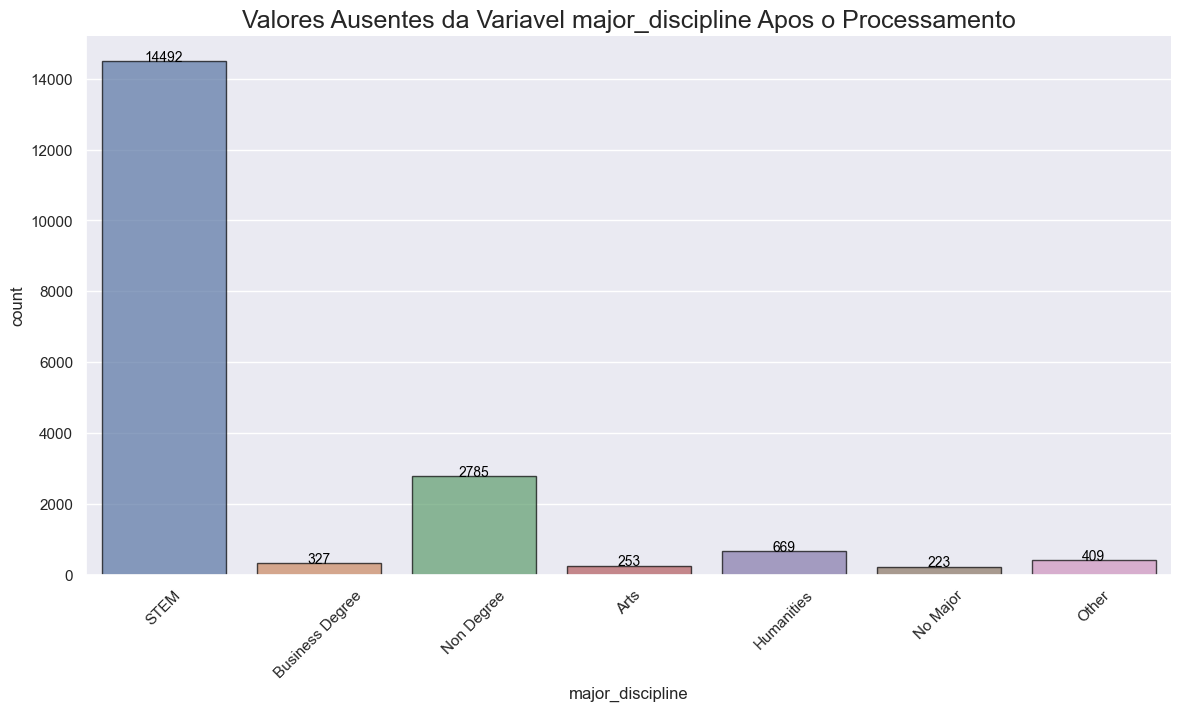

In [50]:
# Valores Ausentes da Variável major_discipline Após o Processamento
plt.figure(figsize = (14, 7))
sns.countplot(data = new_df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound = ax.get_xbound()
ax = plt.gca()
plt.title('Valores Ausentes da Variavel major_discipline Apos o Processamento', fontsize = 18)
anotacoes()

In [51]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável enrolled_university

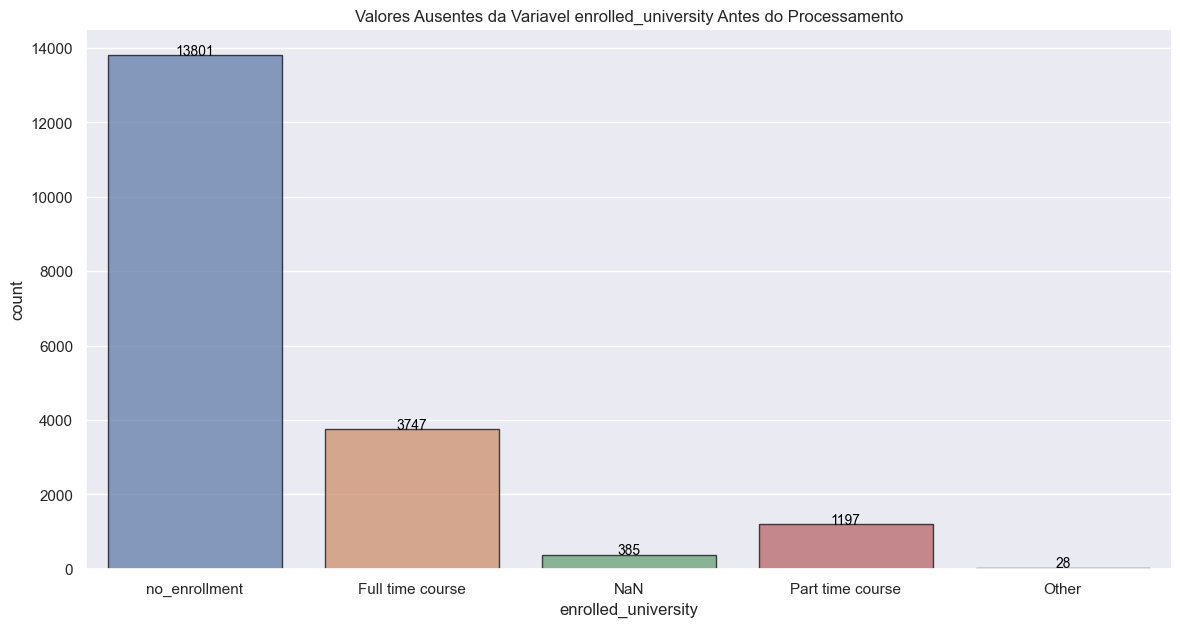

In [52]:
plt.figure(figsize=(14, 7))
sns.countplot(data = new_df.fillna('NaN'), x='enrolled_university', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
plt.title('Valores Ausentes da Variavel enrolled_university Antes do Processamento')
anotacoes()

In [53]:
print('Total de Valores Ausentes da Variavel enrolled_university: ', new_df['enrolled_university'].isna().sum())
print('Proporção d valores ausentes na variavel education_level: ')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes da Variavel enrolled_university:  385
Proporção d valores ausentes na variavel education_level: 


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.

In [54]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) &
                   (new_df['education_level'] == 'Primary School')]).index

In [55]:
len(nan_index)

9

In [56]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = 'Primary Grad'

C:\Users\franc\AppData\Local\Temp\ipykernel_15048\2056357900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['enrolled_university'][nan_index] = 'Primary Grad'


In [57]:
print('Total de valores ausentes: ', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Total de valores ausentes:  376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [58]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index
nan_index

Int64Index([    3,    13,    62,    69,   171,   224,   260,   343,   355,
              366,
            ...
            18840, 18851, 18892, 18953, 18954, 18958, 18965, 19014, 19109,
            19120],
           dtype='int64', length=376)

In [59]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

C:\Users\franc\AppData\Local\Temp\ipykernel_15048\3326999782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['enrolled_university'][nan_index] = 'Other'


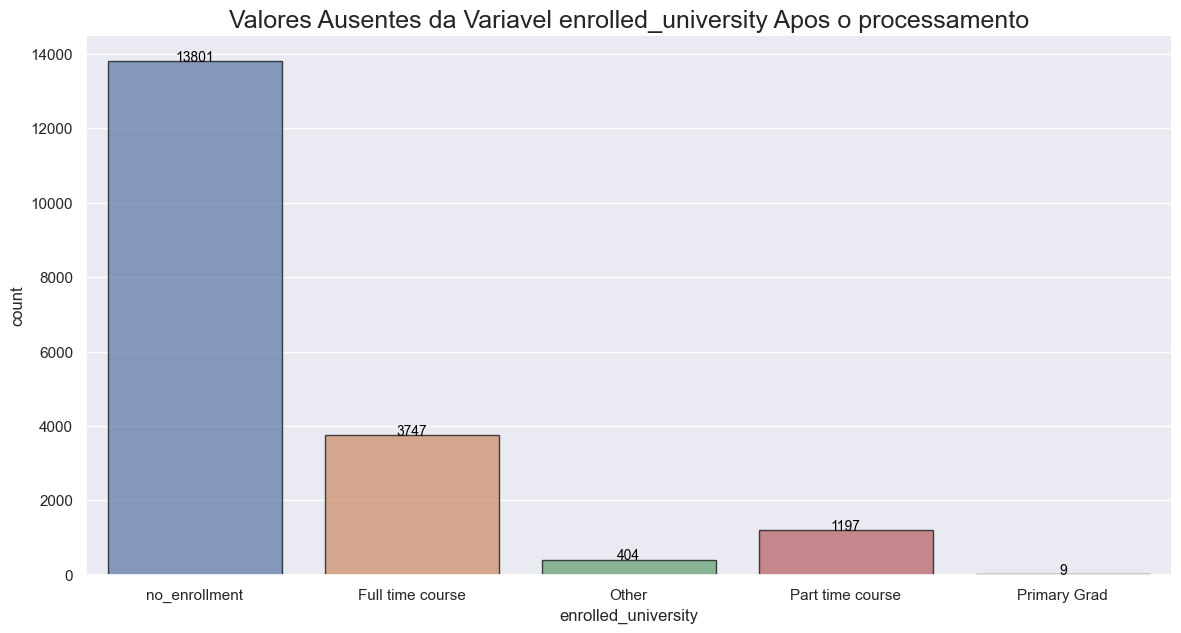

In [60]:
# Plot
plt.figure(figsize = (14, 7))
sns.countplot(data=new_df.fillna('NaN'), x='enrolled_university', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
plt.title('Valores Ausentes da Variavel enrolled_university Apos o processamento', fontsize=18)
anotacoes()

In [61]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type

# Variavel company_type

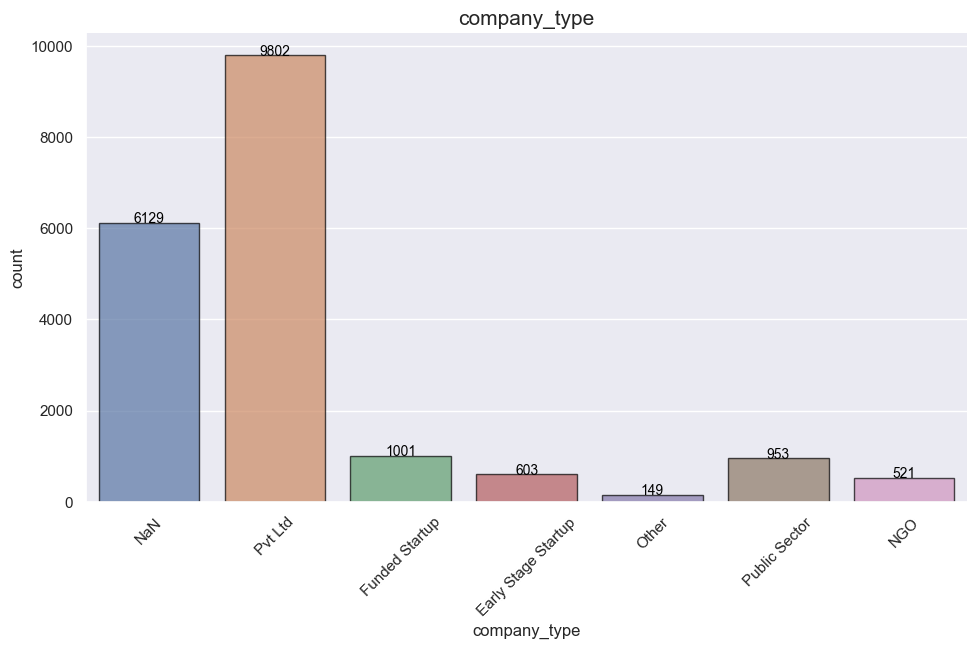

In [62]:
# Plot
plt.figure(figsize = (25, 28))
column_list = ['company_type']
contador = 0

for i in column_list:
    contador += 1
    plt.subplot(4, 2, contador)
    ax = sns.countplot(data = new_df.fillna('NaN'), x=i, alpha=0.7, edgecolor='black')
    sns.despine()
    plt.title(i, fontsize = 15)
if contador >= 0:
    plt.xticks(rotation = 45)
anotacoes()

In [63]:
new_df['company_type'].value_counts(dropna=False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [64]:
# Indice
nan_index = new_df[(new_df['company_type'].isna())].index

In [65]:
# Imputação dos valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

C:\Users\franc\AppData\Local\Temp\ipykernel_15048\1459006836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['company_type'][nan_index] = 'Other'


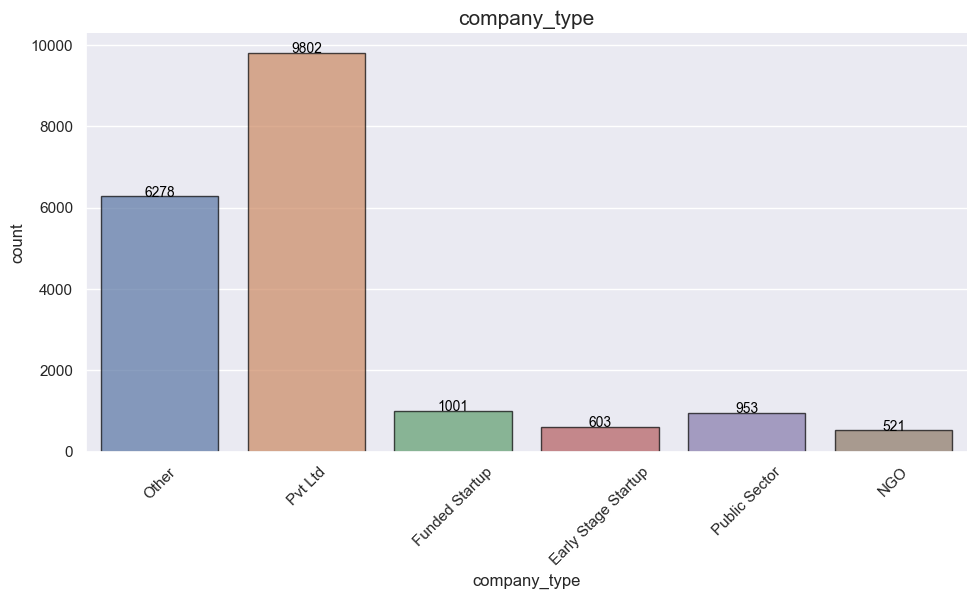

In [66]:
# Plot grafico
plt.figure(figsize = (25, 25))
column_list = ['company_type']

contador = 0

for i in column_list:
    contador += 1
    plt.subplot(4, 2, contador)
    ax = sns.countplot(data = new_df.fillna('NaN'), x=i, alpha=0.7, edgecolor='black')
    sns.despine()
    plt.title(i, fontsize=15)

if contador >= 0:
    plt.xticks(rotation = 45)
    
anotacoes()

In [67]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level

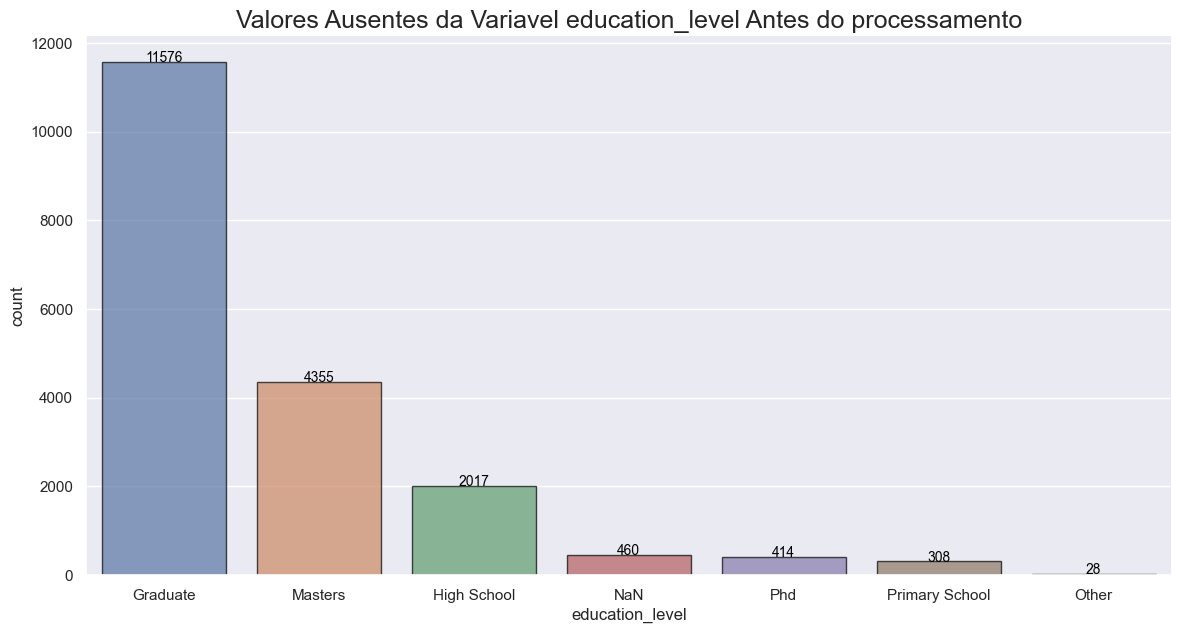

In [68]:
# Plot grafico
plt.figure(figsize = (14, 7))
sns.countplot(data = new_df.fillna('NaN'), x='education_level', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
plt.title('Valores Ausentes da Variavel education_level Antes do processamento', fontsize=18)
anotacoes()

In [69]:
# Indice
nan_index = new_df[(new_df['education_level'].isna())].index

In [70]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

C:\Users\franc\AppData\Local\Temp\ipykernel_15048\2160090567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['education_level'][nan_index] = 'Other'


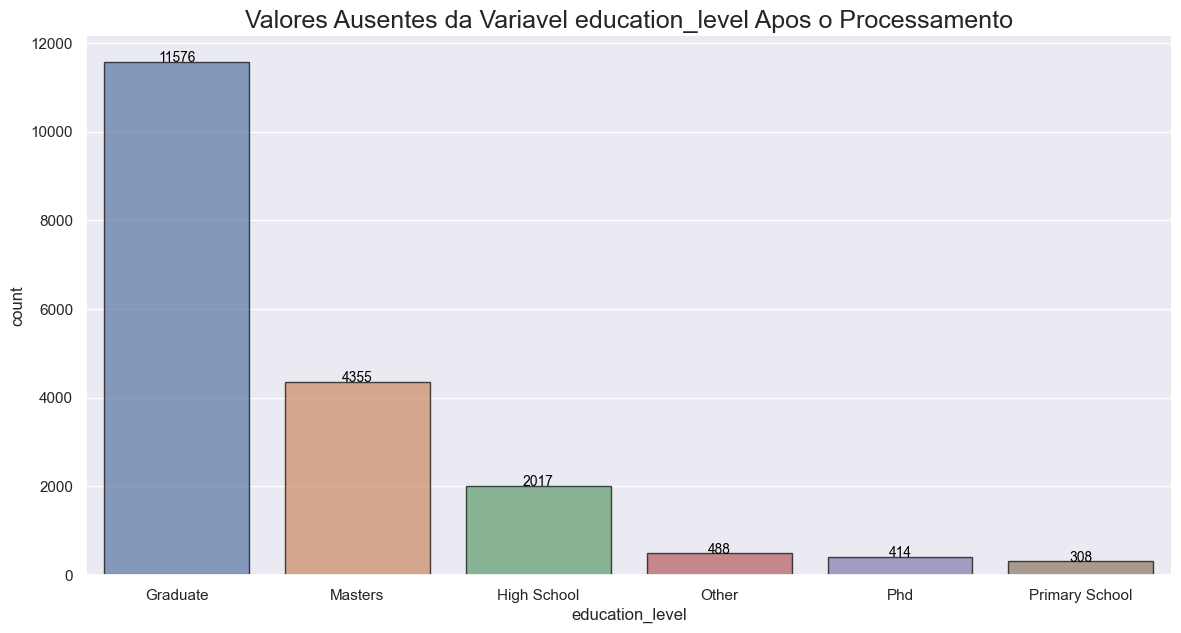

In [71]:
# Plot grafico
plt.figure(figsize = (14, 7))
sns.countplot(data=new_df.fillna('NaN'), x='education_level', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
plt.title('Valores Ausentes da Variavel education_level Apos o Processamento', fontsize=18)
anotacoes()

In [72]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience

In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [74]:
new_df['experience'].value_counts(dropna=False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [75]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [76]:
new_df['experience'].isnull().sum()

63

In [77]:
new_df.shape

(19158, 8)

In [78]:
new_df = new_df.dropna()

In [79]:
new_df.shape

(19095, 8)

In [80]:
percent_miss = new_df.isnull().sum() * 100 / len(new_df)
percent_miss

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

C:\Users\franc\anaconda3\envs\Python10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


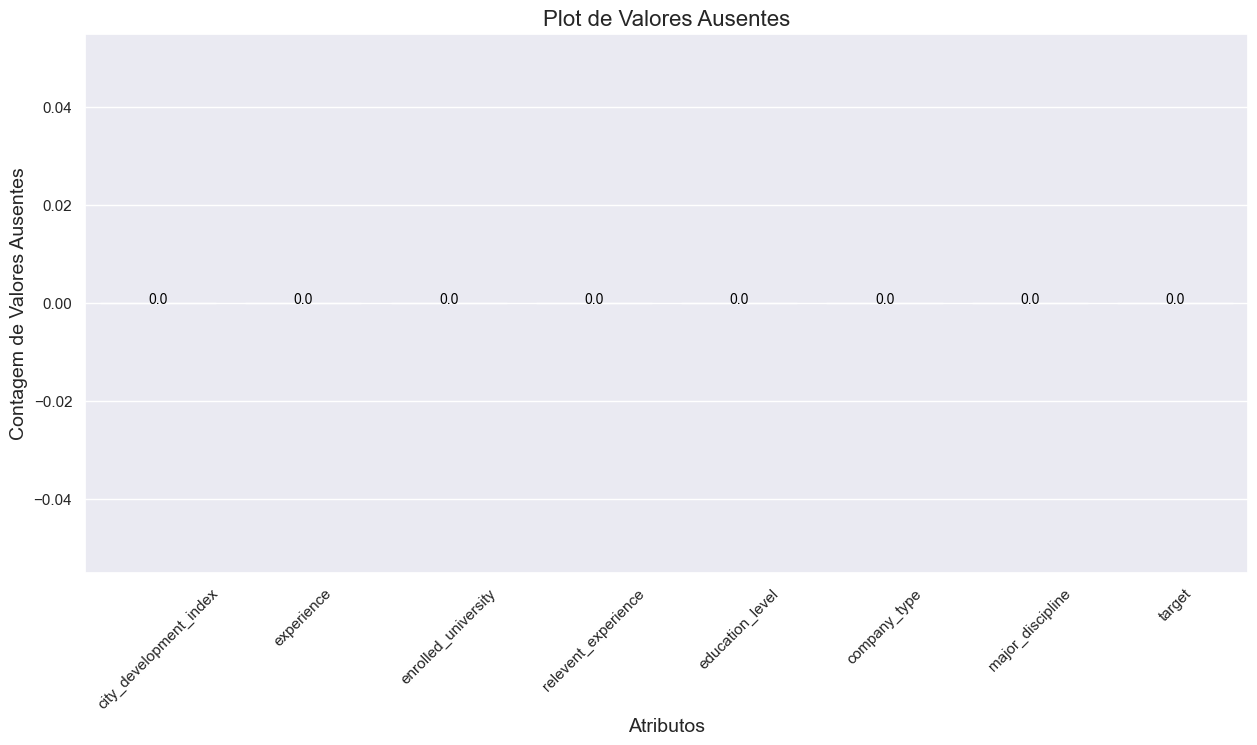

In [81]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15, 7))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('Atributos', fontsize = 14)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 14)
plt.xticks(rotation = 45)
plt.title('Plot de Valores Ausentes', fontsize = 16)
anotacoes()

### Ajustes Finais

In [82]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [83]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [84]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [85]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Relatório Final

Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.